# Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, utils
from tensorflow import keras
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '../../')
from plot_graphs import plot_loss, plot_acc

# Setting Image and Batch Size

In [2]:
IMAGE_SIZE = 100
BATCH_SIZE = 32

# Loading the train, val, and test data

In [3]:
train = utils.image_dataset_from_directory("../../datasets/data/split/Zenodo/train", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
val = utils.image_dataset_from_directory("../../datasets/data/split/Zenodo/val", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
test = utils.image_dataset_from_directory("../../datasets/data/split/Zenodo/test", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

Found 3360 files belonging to 6 classes.
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Found 720 files belonging to 6 classes.
Found 720 files belonging to 6 classes.


2022-08-07 15:08:24.161817: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-07 15:08:24.161972: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Defining the model

In [4]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
# x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(6, activation='softmax')(x)

model = keras.Model(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        9248  

# Adding Callbacks

In [5]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=10
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="../../models/zenodo/m6_modified_replication.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]

# Running the model

In [6]:
history = model.fit(
  train.cache(),
  epochs=60,
  callbacks=callbacks_list,
  validation_data=val.cache()
)

Epoch 1/60


2022-08-07 15:08:24.909019: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-07 15:08:24.909111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


103/105 [============================>.] - ETA: 0s - loss: 3.2374 - accuracy: 0.2042

2022-08-07 15:08:27.688203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


105/105 [==============================] - 4s 26ms/step - loss: 3.2099 - accuracy: 0.2027 - val_loss: 1.7904 - val_accuracy: 0.2125
Epoch 2/60
105/105 [==============================] - 2s 23ms/step - loss: 1.8717 - accuracy: 0.2131 - val_loss: 1.7738 - val_accuracy: 0.1861
Epoch 3/60
105/105 [==============================] - 2s 23ms/step - loss: 1.7871 - accuracy: 0.2536 - val_loss: 1.5859 - val_accuracy: 0.4250
Epoch 4/60
105/105 [==============================] - 3s 24ms/step - loss: 1.5805 - accuracy: 0.3688 - val_loss: 1.2734 - val_accuracy: 0.5403
Epoch 5/60
105/105 [==============================] - 2s 22ms/step - loss: 1.3775 - accuracy: 0.4869 - val_loss: 1.5539 - val_accuracy: 0.4556
Epoch 6/60
105/105 [==============================] - 2s 23ms/step - loss: 1.1501 - accuracy: 0.5628 - val_loss: 1.2901 - val_accuracy: 0.4819
Epoch 7/60
105/105 [==============================] - 2s 23ms/step - loss: 1.0217 - accuracy: 0.6137 - val_loss: 1.0178 - val_accuracy: 0.6222
Epoch 8/60

# Evaluating the model

In [7]:
# model.evaluate(test)

load_model = keras.models.load_model("../../models/zenodo/m6_modified_replication.h5")
load_model.evaluate(test)

 9/23 [==========>...................] - ETA: 0s - loss: 0.2833 - accuracy: 0.9201

2022-08-07 15:10:14.314847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 13ms/step - loss: 0.2977 - accuracy: 0.9111


[0.29771965742111206, 0.9111111164093018]

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/pyplot.py'>

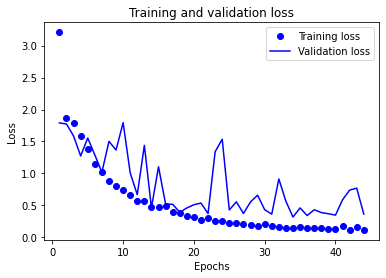

In [8]:
# Plotting loss and accuracy graphs
## Plotting loss
plot_loss(history)

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/pyplot.py'>

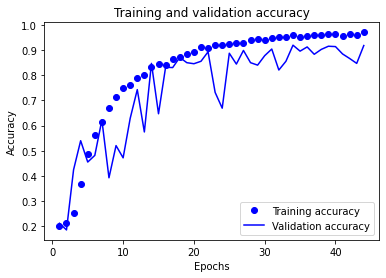

In [9]:
## Plotting accuracy
plot_acc(history)